<a href="https://colab.research.google.com/github/masatokg/AI_teach2020/blob/master/2020AI0204_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 回帰分析で気象データを分析

### ライブラリを読み込み、気象データもGithubから読み込む

In [1]:
# ライブラリのimport
import urllib.request as req
import pandas as pd
# ファイルをgithubからダウンロード(url文字列変数を定義)
url = "https://raw.githubusercontent.com/masatokg/JapaneseMeteorologicalAgencySample/master/data_Fukoka.csv"
# 保存ファイル名を指定
savefile = "kion20y.csv"
# urlからデータをダウンロードして、指定した保存ファイル名で保持する
req.urlretrieve(url, savefile)
print("Colab環境に保存しました")
# ファイルデータをプログラムに読み込んで表示
df = pd.read_csv(savefile, encoding="utf-8")
df.head()

Colab環境に保存しました


,年,月,日,気温,品質,均質
0,1998,1,1,7.9,8,1
1,1998,1,2,8.7,8,1
2,1998,1,3,9.7,8,1
3,1998,1,4,8.5,8,1
4,1998,1,5,6.3,8,1


## 過去の日付ごとの各年の気温をリストにまとめて平均気温を算出

In [2]:
# 20年間の気温を日付ごとに抜き出して各リストにまとめる
# 日付の配列リストを保持するリスト（2次元配列リスト）をmdという名で定義
md = {} #とりあえず空のリストを宣言
# dfの各行を変数rowに入れながらループを回してゆく
for i, row, in df.iterrows(): # iはカウンター変数
  # 各行の「月」列の値を整数にしてmに、「日」の値を整数にしてdに、「気温」を小数にしてvに代入
  m, d, v = ( int(row['月']), int(row['日']), float(row['気温']) )
  # mとdの値を文字列結合して二次元配列リストの行のキーにする
  key = str(m) + "/" + str(d) # 「1/1」のような文字列ができあがる
  # mdの中に「1/1」などのキー名の行（配列リスト）がなければ新規に追加
  if not(key in md): md[key] = []
  # md の該当キー名の行に新しい配列要素としてvの値を追加する
  md[key] += [v]
# ループ終了
# できあがった日付リストを表示（日付ごとの各年の気温リスト）
print(md)
# 日付ごとに各年の気温を合計し、年数でわることで、平均気温を求める
avs = {} # 平均気温用のリスト変数
# ループしながらmdからkeyをとりだす
for key in md:
  # mdのキーの行の合計を、mdのキーの行の列数（年の数）で割った値を平均値として、リストに要素追加
  avs[key] = sum(md[key])/len(md[key])
  # 変数vに代入してテスト表示
  # v = avs[key] = sum(md[key])/len(md[key])
  # print("{0}の平均気温:{1}".format(key, v)) # keyに対応する値を表示
# ループ終わり
# 試して表示
print("1/3の平均気温は{0}".format(avs["1/3"]))


{'1/1': [7.9, 6.6, 9.6, 7.8, 7.8, 7.1, 9.9, 4.9, 6.8, 8.9, 4.3, 3.8, 3.5, 3.3, 7.9, 4.9, 10.5, 2.8, 7.3, 8.1, 6.4], '1/2': [8.7, 8.1, 12.1, 9.1, 3.1, 6.2, 9.3, 4.6, 8.1, 9.9, 5.8, 6.1, 6.6, 5.2, 6.1, 6.9, 8.1, 4.4, 11.6, 8.2, 5.6], '1/3': [9.7, 8.7, 10.3, 6.7, 4.6, 6.4, 8.8, 9.3, 7.3, 10.2, 6.5, 6.2, 7.0, 4.5, 6.7, 2.7, 8.4, 4.4, 11.6, 9.0, 7.6], '1/4': [8.5, 8.4, 8.9, 5.4, 10.3, 2.6, 8.2, 8.1, 4.4, 9.3, 7.0, 7.5, 6.9, 4.3, 4.4, 2.8, 9.5, 8.6, 11.0, 9.8, 6.2], '1/5': [6.3, 8.4, 10.9, 4.7, 9.5, 1.3, 8.2, 6.2, 3.5, 8.9, 8.1, 7.9, 4.9, 5.8, 4.8, 4.2, 8.6, 9.7, 9.9, 9.4, 6.2], '1/6': [8.2, 10.2, 13.9, 5.9, 6.3, 1.9, 8.8, 6.9, 3.1, 6.7, 8.3, 8.5, 4.3, 4.0, 5.0, 4.5, 8.3, 12.3, 9.5, 9.2, 7.5], '1/7': [7.0, 7.5, 7.0, 9.0, 7.8, 3.4, 9.4, 8.5, 2.7, 6.9, 11.0, 8.6, 3.9, 3.6, 6.2, 5.9, 8.7, 7.2, 9.1, 8.0, 7.4], '1/8': [10.1, 3.7, 7.2, 11.1, 4.7, 4.7, 8.2, 6.2, 2.9, 7.5, 9.8, 8.7, 4.5, 4.6, 7.7, 8.2, 8.4, 6.1, 7.5, 11.1, 10.9], '1/9': [9.3, 3.1, 7.0, 10.1, 6.2, 5.9, 6.9, 4.2, 4.2, 6.4, 9.3, 7.9, 6

### ループ計算の代わりにpandasのgroupbyを使って集計する

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)


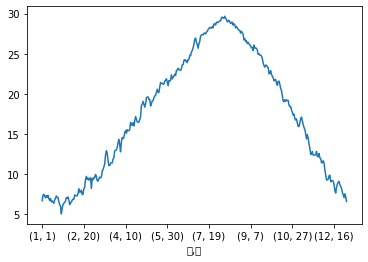

In [3]:
# pandasのgrupubyメソッドで指定したキー単位のグループを作る
g = df.groupby(['月','日'])['気温'] # 月・日ごとの気温グループを作る
# 各グループごとに、月・日ごとの気温の値を集計してグループの要素数で割る
gg = g.sum()/g.count()
# グラフ表示してみるためにmatplotlibライブラリのpyplotをimport
import matplotlib.pyplot as plt
# プロット用データを生成
gg.plot()
# 画像として保存
plt.savefig("tenki-heikin.png")
# プロットデータを表示
plt.show()

### Pandasで気温が30度を超えた日をフィルタリングしてみる

      年  月  日   気温  品質  均質
0  1998  1  1  7.9   8   1
1  1998  1  2  8.7   8   1
2  1998  1  3  9.7   8   1
3  1998  1  4  8.5   8   1
4  1998  1  5  6.3   8   1
         年  月   日    気温  品質  均質
184   1998  7   4  30.3   8   1
188   1998  7   8  30.3   8   1
189   1998  7   9  30.2   8   1
213   1998  8   2  30.8   8   1
214   1998  8   3  30.2   8   1
...    ... ..  ..   ...  ..  ..
7537  2018  8  21  32.0   8   1
7538  2018  8  22  32.8   8   1
7539  2018  8  23  31.2   8   1
7540  2018  8  24  30.6   8   1
7542  2018  8  26  30.7   8   1

[272 rows x 6 columns]
年
1998    15
1999     3
2000     9
2001    12
2002     6
2004    17
2005     8
2006    14
2007    11
2008    13
2009     7
2010    27
2011     9
2012    15
2013    37
2014     3
2015     4
2016    20
2017    19
2018    23
Name: 年, dtype: int64


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


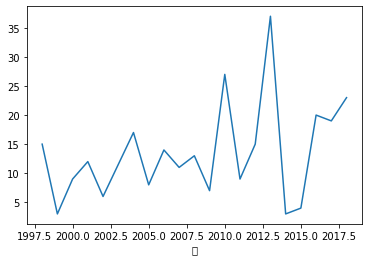

In [4]:
# データの先頭を改めて表示して確認
print( df.head() )
# 「気温列の値が30より大きい」という条件でフィルタリングするために、条件式を変数化する
atui_bool = ( df["気温"]>30 )
# 作成した条件でデータをフィルタリングして抽出
atui = df[atui_bool]
# 抽出したデータを表示
print( atui )
# 年列の値でグループ化して、そのカウントを表示してみる（例：1998年は3日、など）
cnt = atui.groupby(["年"])["年"].count()
# cnt は keyは年の値、valueはカウント数、のリスト
print(cnt)
# プロットデータを作って表示してみる
cnt.plot()
plt.savefig("tenki-over30.png") # 画像ファイルとしても保存
# プロットを表示
plt.show()
# 近年増えているのがわかる

## 回帰分析で翌日の気温を推論する

### データを説明変数(x)と目的変数(y)にわける

In [5]:
# データの学習用とテスト用にわける条件変数を定義（あとで使う）
train_year = (df["年"]<=2017) #学習用
test_year = (df["年"]>=2018) #テスト検証用
# 遡って過去何日分のデータをもとに予測を立てるか、変数にしておく
interval = 6 #該当日の過去6日分遡って、その値を基に該当日の気温を推論する

# 引数で引き渡されたデータから、説明変数と目的変数を分離する関数を定義する
def make_data(data):
  x = [] #説明変数のリストを入れる変数を空で宣言
  y = [] #目的変数のリストを入れる変数を空で宣言
  # 引数で引き渡された変数のDataFrameから「気温」列の値のリストを抽出
  temps = list(data["気温"])
  # ループしながら、ひとつずつ、6個前のデータ(説明変数)と該当データ(目的変数)とに分離する
  for i in range(len(temps)): # 初日から年の最終日までループ。iはカウンタ変数
    if i < interval: continue # iが6未満なら、つまり該当日の過去が6日分ないうちは、スルーして次へ
    # 7日目以降の温度をyに入れる(目的変数)
    y.append(temps[i])
    xa = [] # 該当日の6日前分の気温を入れるリストを定義
    # ループしながら該当日の6つ前分の気温を１つずつ リスト:xa に追加する
    for p in range(interval): # intervalが6なら、0,1,2,3,4,5の範囲がrange、pがカウンタ変数
      d = i + p - interval # 年の初日から最終日まで、dは該当日の6つ前～1つ前のindex値になる
      xa.append(temps[d])
    # 小さいループの終わり
  # できあがった xa を、説明変数xのリストの1要素として追加登録
    x.append(xa)
  # 大きい外側ループの終わり（インデントに注意）
  return x, y
# 関数定義 def の終わり（インデントに注意）

# 最初に宣言した条件変数を利用して、
# 学習用データ、テスト検証用データ、それぞれ抽出してから関数make_dataに引き渡す

# 学習用データを抽出してからmake_data()に引き渡してxとyに分離する
train_x, train_y = make_data( df[train_year] )

# テスト検証用データを抽出してからmake_data()に引き渡してxとyに分離する
test_x, test_y = make_data( df[test_year] )


### 作成したデータで線形回帰分析を行う

In [6]:
# 線形回帰のアルゴリズムのimport
from sklearn.linear_model import LinearRegression
# 線形回帰のアルゴリズムの学習モデルアルゴリズムを生成する
Lr = LinearRegression(normalize=True)
# モデルの学習を実行（fitメソッド）
Lr.fit(train_x, train_y) # 説明変数と目的変数を引き渡す

# 学習が終わったモデルを使ってテスト検証する(predictメソッド)
pre_y = Lr.predict(test_x)  # テスト検証用の説明変数を引き渡し、推論結果を受け取る


### プロットに日本語を表示するためにOSに日本語フォントをインストール

In [7]:
# フォントのキャッシュをクリア
# matplotlib のキャッシュディレクトリ配下の font 関連のファイルを確認
!ls -ll /root/.cache/matplotlib/ | grep font
# matplotlibのフォント関連のキャッシュを削除
!rm /root/.cache/matplotlib/fontList.json
!rm /root/.cache/matplotlib/fontlist-v310.json
# プロットに日本語を表示するためにOSに日本語フォントをインストール
# OSは ubuntu(Linux) なので apt-get コマンドでインストール
!apt-get -y install fonts-ipafont-gothic

-rw-r--r-- 1 root root 30935 Oct 20 05:04 fontlist-v310.json
rm: cannot remove '/root/.cache/matplotlib/fontList.json': No such file or directory
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


### データが多いので、予測（推論）結果を画面に表示して確認

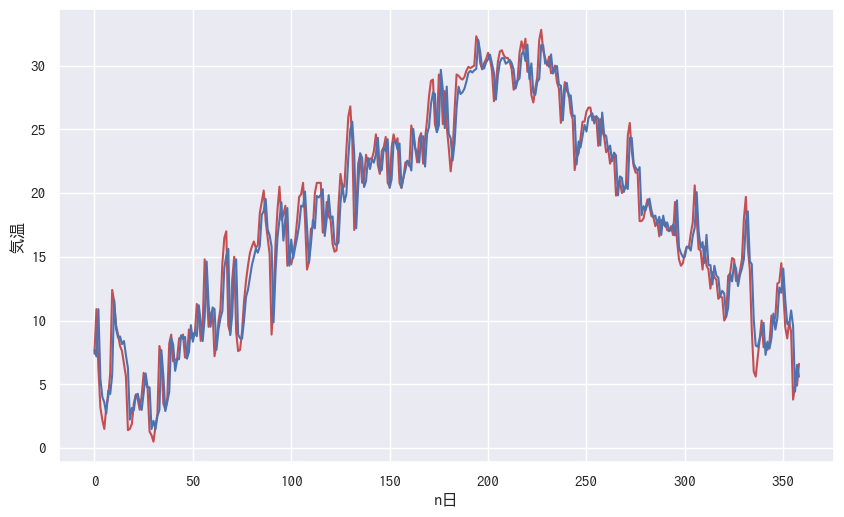

In [8]:
# 日本語を含んでmatplotlibでプロットするために、ライブラリを使う（seaborn）
import seaborn as sbn
# seabornで日本語対応のフォントをセットすることで、日本語が使えるようになる
# インストールしたIPAゴシックを指定
sbn.set(font="IPAGothic")

# matplotlib でデータプロットを作成
plt.figure( figsize=(10, 6), dpi=100 ) # 引数に図のサイズと解像度を指定
plt.xlabel("n日") # 横軸(x軸)のラベル表示文字列を指定
plt.ylabel("気温") # 縦軸(y軸)のラベル表示文字列を指定
plt.plot(test_y, c="r") # テスト検証用目的変数（2018年度の実際のデータ）を赤色でプロット
plt.plot(pre_y, c="b")  # 推論結果（2018年度の予測推論の結果）を青色でプロット
# 赤と青の線がかぶればかぶるほど、推論の精度が高い
plt.savefig("tenki-kion-Lr.png")  # 指定した名前でサーバ内にファイル保存
# できあがったプロットを描画する
plt.show()


In [10]:
# 推論と実測値の誤差の平均を計算してみる
diff_y = abs(pre_y - test_y) # リスト同士の差分をリストとして取得
# 差分を合計して平均をとって画面に表示
print(  "average=" , sum(diff_y)/len(diff_y) )
# 誤差の最大値を表示
print("max=", max(diff_y) )


average= 1.3279674206618133
max= 6.888714505244241
